# Least Squares GAN (LSGAN) Implementation on MNIST Dataset
This notebook implements the LSGAN using the MNIST dataset. It includes detailed explanations for each step.

## Step 1: Import Libraries

In [1]:
import torch  # PyTorch library for tensor operations and deep learning
import torch.nn as nn  # Provides modules for defining neural network layers
import torch.optim as optim  # Contains optimizers like Adam for model training
from torch.utils.data import DataLoader  # Utility for batching and shuffling data
from torchvision import datasets, transforms  # Includes datasets and preprocessing transforms
import matplotlib.pyplot as plt  # Used for visualizing generated images

## Step 2: Define the Generator and Discriminator

In [2]:
class Generator(nn.Module):  # Inherit from PyTorch's base class for models
    def __init__(self, noise_dim, img_channels):
        super(Generator, self).__init__()  # Initialize the parent class
        self.model = nn.Sequential(  # Sequential container to stack layers
            nn.Linear(noise_dim, 256),  # Fully connected layer: Input noise to 256 units
            nn.ReLU(),  # Activation function: ReLU introduces non-linearity
            nn.Linear(256, 512),  # Fully connected layer: 256 units to 512 units
            nn.ReLU(),  # Activation for the second layer
            nn.Linear(512, 1024),  # Fully connected layer: 512 units to 1024 units
            nn.ReLU(),  # Activation for the third layer
            nn.Linear(1024, img_channels * 28 * 28),  # Map to image size (MNIST: 28x28 pixels)
            nn.Tanh()  # Activation: Output values normalized to [-1, 1]
        )
    
    def forward(self, z):  # Define the forward pass
        img = self.model(z)  # Pass the input noise through the network
        img = img.view(img.size(0), 1, 28, 28)  # Reshape output to (Batch, Channels, Height, Width)
        return img  # Return the generated image


In [3]:
class Discriminator(nn.Module):  # Inherit from PyTorch's base class for models
    def __init__(self, img_channels):
        super(Discriminator, self).__init__()  # Initialize the parent class
        self.model = nn.Sequential(  # Sequential container for stacking layers
            nn.Linear(img_channels * 28 * 28, 1024),  # Flatten input image to 1024 units
            nn.LeakyReLU(0.2),  # Activation function with slight slope for negative values
            nn.Linear(1024, 512),  # Fully connected layer: 1024 to 512 units
            nn.LeakyReLU(0.2),  # Activation for the second layer
            nn.Linear(512, 256),  # Fully connected layer: 512 to 256 units
            nn.LeakyReLU(0.2),  # Activation for the third layer
            nn.Linear(256, 1)  # Output a single value (real or fake score)
        )
    
    def forward(self, img):  # Define the forward pass
        img_flat = img.view(img.size(0), -1)  # Flatten the input image to a 1D vector
        validity = self.model(img_flat)  # Pass the input through the network
        return validity  # Return the real/fake score


## Step 3: Define Hyperparameters

In [4]:
batch_size = 64  # Number of images per batch
lr = 0.0002  # Learning rate for optimizers
epochs = 100  # Number of training epochs
noise_dim = 100  # Dimensionality of the input noise vector
img_channels = 1  # MNIST has 1 channel (grayscale images)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available


## Step 4: Prepare Dataset and DataLoader

In [5]:
# Define data transformations for preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values to [-1, 1]
])

# Load the MNIST dataset
dataset = datasets.MNIST(root="./data", download=True, transform=transform)

# Create a DataLoader for batching and shuffling the dataset
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


## Step 5: Initialize Models and Optimizers

In [6]:
# Instantiate the Generator and Discriminator models
generator = Generator(noise_dim, img_channels).to(device)  # Move Generator to GPU/CPU
discriminator = Discriminator(img_channels).to(device)  # Move Discriminator to GPU/CPU

# Define optimizers for both models
optimizer_G = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))  # Optimizer for Generator
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))  # Optimizer for Discriminator


In [7]:
criterion = nn.MSELoss()  # Mean Squared Error loss for LSGAN


## Step 6: Training Loop

Epoch [1/100] Batch [1/938] D Loss: 0.0934, G Loss: 0.7969
Epoch [1/100] Batch [2/938] D Loss: 0.1110, G Loss: 0.8026
Epoch [1/100] Batch [3/938] D Loss: 0.1147, G Loss: 0.8388
Epoch [1/100] Batch [4/938] D Loss: 0.1210, G Loss: 0.7364
Epoch [1/100] Batch [5/938] D Loss: 0.1277, G Loss: 0.9634
Epoch [1/100] Batch [6/938] D Loss: 0.1253, G Loss: 0.5955
Epoch [1/100] Batch [7/938] D Loss: 0.1412, G Loss: 1.0683
Epoch [1/100] Batch [8/938] D Loss: 0.1613, G Loss: 0.3794
Epoch [1/100] Batch [9/938] D Loss: 0.2044, G Loss: 0.8717
Epoch [1/100] Batch [10/938] D Loss: 0.1819, G Loss: 0.4596
Epoch [1/100] Batch [11/938] D Loss: 0.1799, G Loss: 0.5595
Epoch [1/100] Batch [12/938] D Loss: 0.1570, G Loss: 0.6325
Epoch [1/100] Batch [13/938] D Loss: 0.1604, G Loss: 0.5196
Epoch [1/100] Batch [14/938] D Loss: 0.1315, G Loss: 0.7249
Epoch [1/100] Batch [15/938] D Loss: 0.1099, G Loss: 0.6349
Epoch [1/100] Batch [16/938] D Loss: 0.0922, G Loss: 0.9046
Epoch [1/100] Batch [17/938] D Loss: 0.0818, G Lo

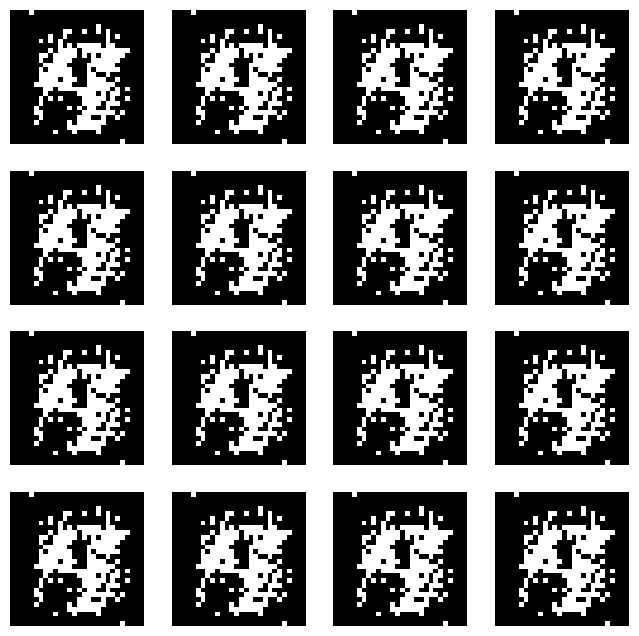

Epoch [11/100] Batch [1/938] D Loss: 0.0003, G Loss: 1.0081
Epoch [11/100] Batch [2/938] D Loss: 0.0002, G Loss: 1.0017
Epoch [11/100] Batch [3/938] D Loss: 0.0002, G Loss: 0.9903
Epoch [11/100] Batch [4/938] D Loss: 0.0002, G Loss: 1.0006
Epoch [11/100] Batch [5/938] D Loss: 0.0002, G Loss: 0.9996
Epoch [11/100] Batch [6/938] D Loss: 0.0002, G Loss: 1.0067
Epoch [11/100] Batch [7/938] D Loss: 0.0001, G Loss: 1.0038
Epoch [11/100] Batch [8/938] D Loss: 0.0002, G Loss: 0.9911
Epoch [11/100] Batch [9/938] D Loss: 0.0001, G Loss: 1.0056
Epoch [11/100] Batch [10/938] D Loss: 0.0002, G Loss: 0.9895
Epoch [11/100] Batch [11/938] D Loss: 0.0002, G Loss: 1.0149
Epoch [11/100] Batch [12/938] D Loss: 0.0002, G Loss: 0.9880
Epoch [11/100] Batch [13/938] D Loss: 0.0002, G Loss: 1.0055
Epoch [11/100] Batch [14/938] D Loss: 0.0002, G Loss: 1.0057
Epoch [11/100] Batch [15/938] D Loss: 0.0002, G Loss: 0.9918
Epoch [11/100] Batch [16/938] D Loss: 0.0002, G Loss: 0.9932
Epoch [11/100] Batch [17/938] D L

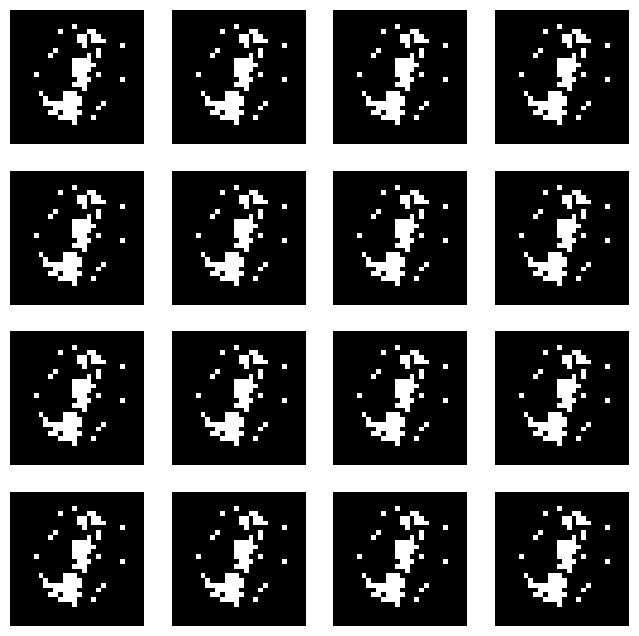

Epoch [21/100] Batch [1/938] D Loss: 0.0013, G Loss: 0.9974
Epoch [21/100] Batch [2/938] D Loss: 0.0008, G Loss: 0.9977
Epoch [21/100] Batch [3/938] D Loss: 0.0008, G Loss: 0.9993
Epoch [21/100] Batch [4/938] D Loss: 0.0015, G Loss: 0.9906
Epoch [21/100] Batch [5/938] D Loss: 0.0013, G Loss: 0.9865
Epoch [21/100] Batch [6/938] D Loss: 0.0012, G Loss: 0.9833
Epoch [21/100] Batch [7/938] D Loss: 0.0009, G Loss: 0.9919
Epoch [21/100] Batch [8/938] D Loss: 0.0013, G Loss: 0.9990
Epoch [21/100] Batch [9/938] D Loss: 0.0012, G Loss: 0.9977
Epoch [21/100] Batch [10/938] D Loss: 0.0014, G Loss: 0.9847
Epoch [21/100] Batch [11/938] D Loss: 0.0018, G Loss: 0.9808
Epoch [21/100] Batch [12/938] D Loss: 0.0007, G Loss: 0.9933
Epoch [21/100] Batch [13/938] D Loss: 0.0011, G Loss: 0.9963
Epoch [21/100] Batch [14/938] D Loss: 0.0016, G Loss: 0.9935
Epoch [21/100] Batch [15/938] D Loss: 0.0010, G Loss: 0.9985
Epoch [21/100] Batch [16/938] D Loss: 0.0013, G Loss: 1.0013
Epoch [21/100] Batch [17/938] D L

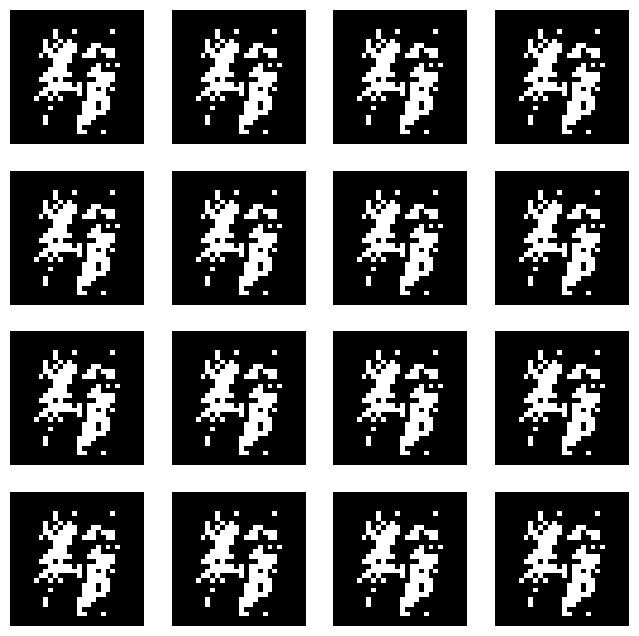

Epoch [31/100] Batch [1/938] D Loss: 0.0000, G Loss: 1.0035
Epoch [31/100] Batch [2/938] D Loss: 0.0001, G Loss: 0.9990
Epoch [31/100] Batch [3/938] D Loss: 0.0001, G Loss: 1.0027
Epoch [31/100] Batch [4/938] D Loss: 0.0001, G Loss: 0.9915
Epoch [31/100] Batch [5/938] D Loss: 0.0001, G Loss: 1.0142
Epoch [31/100] Batch [6/938] D Loss: 0.0002, G Loss: 0.9816
Epoch [31/100] Batch [7/938] D Loss: 0.0002, G Loss: 1.0176
Epoch [31/100] Batch [8/938] D Loss: 0.0002, G Loss: 0.9840
Epoch [31/100] Batch [9/938] D Loss: 0.0002, G Loss: 1.0163
Epoch [31/100] Batch [10/938] D Loss: 0.0002, G Loss: 0.9813
Epoch [31/100] Batch [11/938] D Loss: 0.0002, G Loss: 1.0148
Epoch [31/100] Batch [12/938] D Loss: 0.0001, G Loss: 0.9915
Epoch [31/100] Batch [13/938] D Loss: 0.0001, G Loss: 1.0041
Epoch [31/100] Batch [14/938] D Loss: 0.0001, G Loss: 0.9955
Epoch [31/100] Batch [15/938] D Loss: 0.0001, G Loss: 1.0049
Epoch [31/100] Batch [16/938] D Loss: 0.0001, G Loss: 0.9961
Epoch [31/100] Batch [17/938] D L

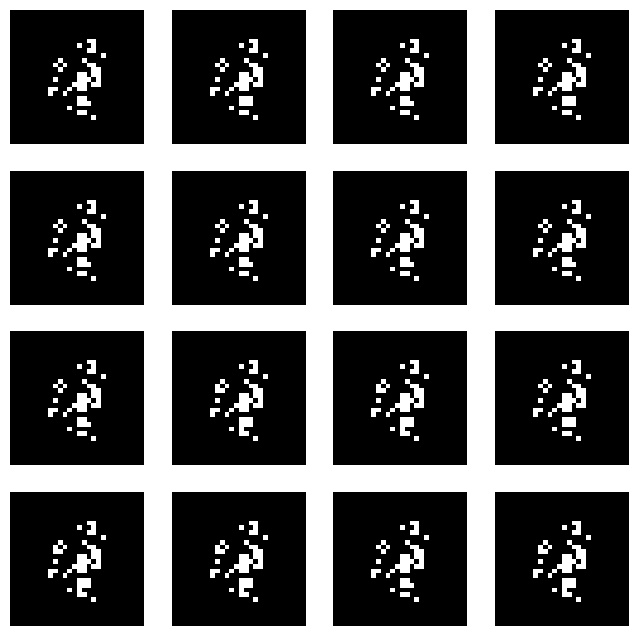

Epoch [41/100] Batch [1/938] D Loss: 0.0000, G Loss: 1.0037
Epoch [41/100] Batch [2/938] D Loss: 0.0000, G Loss: 0.9980
Epoch [41/100] Batch [3/938] D Loss: 0.0000, G Loss: 0.9973
Epoch [41/100] Batch [4/938] D Loss: 0.0001, G Loss: 1.0083
Epoch [41/100] Batch [5/938] D Loss: 0.0000, G Loss: 0.9897
Epoch [41/100] Batch [6/938] D Loss: 0.0001, G Loss: 1.0084
Epoch [41/100] Batch [7/938] D Loss: 0.0001, G Loss: 0.9903
Epoch [41/100] Batch [8/938] D Loss: 0.0001, G Loss: 1.0102
Epoch [41/100] Batch [9/938] D Loss: 0.0001, G Loss: 0.9924
Epoch [41/100] Batch [10/938] D Loss: 0.0001, G Loss: 1.0098
Epoch [41/100] Batch [11/938] D Loss: 0.0001, G Loss: 0.9840
Epoch [41/100] Batch [12/938] D Loss: 0.0001, G Loss: 1.0159
Epoch [41/100] Batch [13/938] D Loss: 0.0001, G Loss: 0.9868
Epoch [41/100] Batch [14/938] D Loss: 0.0001, G Loss: 1.0106
Epoch [41/100] Batch [15/938] D Loss: 0.0001, G Loss: 0.9913
Epoch [41/100] Batch [16/938] D Loss: 0.0001, G Loss: 1.0069
Epoch [41/100] Batch [17/938] D L

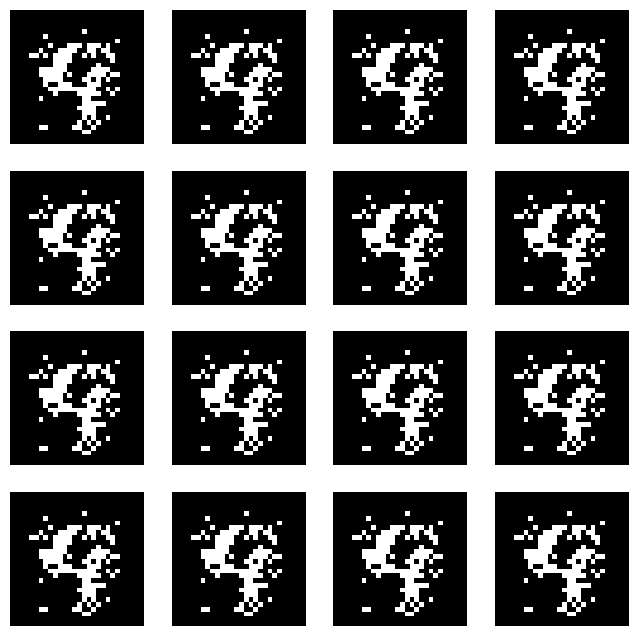

Epoch [51/100] Batch [1/938] D Loss: 0.0000, G Loss: 0.9977
Epoch [51/100] Batch [2/938] D Loss: 0.0000, G Loss: 1.0014
Epoch [51/100] Batch [3/938] D Loss: 0.0000, G Loss: 0.9981
Epoch [51/100] Batch [4/938] D Loss: 0.0000, G Loss: 1.0018
Epoch [51/100] Batch [5/938] D Loss: 0.0000, G Loss: 0.9983
Epoch [51/100] Batch [6/938] D Loss: 0.0000, G Loss: 1.0012
Epoch [51/100] Batch [7/938] D Loss: 0.0000, G Loss: 0.9996
Epoch [51/100] Batch [8/938] D Loss: 0.0000, G Loss: 0.9969
Epoch [51/100] Batch [9/938] D Loss: 0.0000, G Loss: 1.0029
Epoch [51/100] Batch [10/938] D Loss: 0.0000, G Loss: 0.9998
Epoch [51/100] Batch [11/938] D Loss: 0.0000, G Loss: 0.9963
Epoch [51/100] Batch [12/938] D Loss: 0.0000, G Loss: 1.0062
Epoch [51/100] Batch [13/938] D Loss: 0.0000, G Loss: 0.9917
Epoch [51/100] Batch [14/938] D Loss: 0.0000, G Loss: 1.0077
Epoch [51/100] Batch [15/938] D Loss: 0.0000, G Loss: 0.9948
Epoch [51/100] Batch [16/938] D Loss: 0.0000, G Loss: 1.0032
Epoch [51/100] Batch [17/938] D L

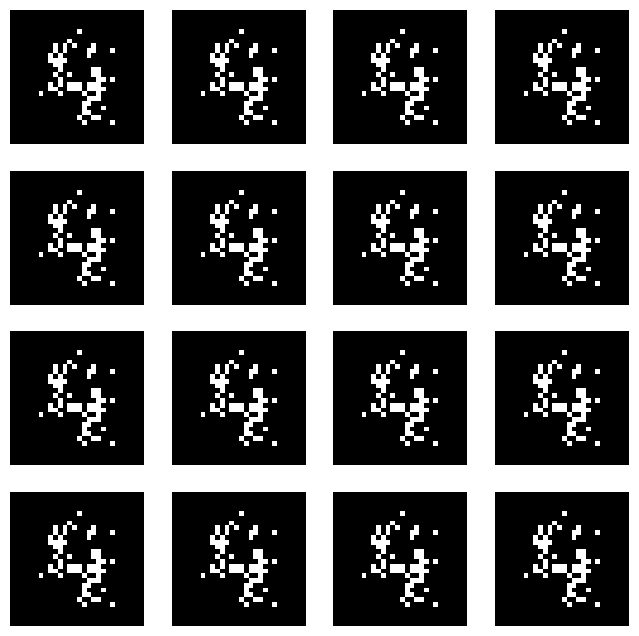

Epoch [61/100] Batch [1/938] D Loss: 0.0001, G Loss: 0.9944
Epoch [61/100] Batch [2/938] D Loss: 0.0001, G Loss: 1.0064
Epoch [61/100] Batch [3/938] D Loss: 0.0001, G Loss: 0.9932
Epoch [61/100] Batch [4/938] D Loss: 0.0001, G Loss: 1.0068
Epoch [61/100] Batch [5/938] D Loss: 0.0000, G Loss: 0.9946
Epoch [61/100] Batch [6/938] D Loss: 0.0000, G Loss: 1.0032
Epoch [61/100] Batch [7/938] D Loss: 0.0000, G Loss: 0.9984
Epoch [61/100] Batch [8/938] D Loss: 0.0000, G Loss: 1.0010
Epoch [61/100] Batch [9/938] D Loss: 0.0000, G Loss: 0.9991
Epoch [61/100] Batch [10/938] D Loss: 0.0000, G Loss: 1.0004
Epoch [61/100] Batch [11/938] D Loss: 0.0000, G Loss: 1.0000
Epoch [61/100] Batch [12/938] D Loss: 0.0000, G Loss: 0.9995
Epoch [61/100] Batch [13/938] D Loss: 0.0000, G Loss: 1.0006
Epoch [61/100] Batch [14/938] D Loss: 0.0000, G Loss: 0.9987
Epoch [61/100] Batch [15/938] D Loss: 0.0000, G Loss: 1.0022
Epoch [61/100] Batch [16/938] D Loss: 0.0000, G Loss: 0.9968
Epoch [61/100] Batch [17/938] D L

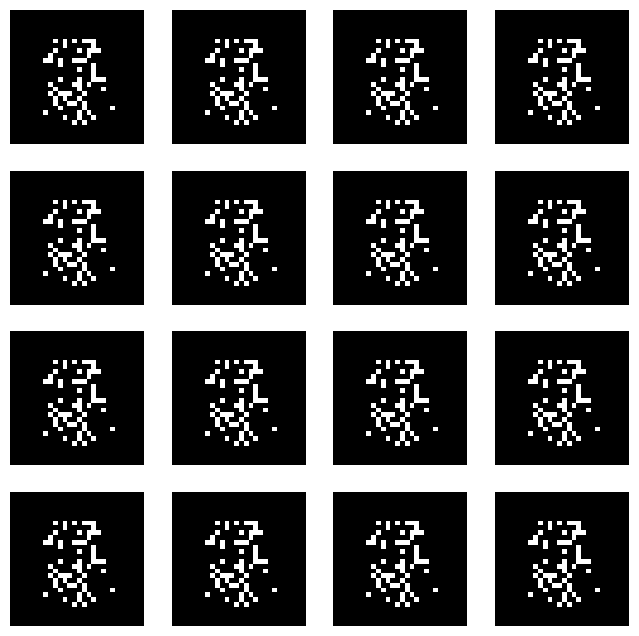

Epoch [71/100] Batch [1/938] D Loss: 0.0002, G Loss: 1.0078
Epoch [71/100] Batch [2/938] D Loss: 0.0002, G Loss: 0.9931
Epoch [71/100] Batch [3/938] D Loss: 0.0001, G Loss: 1.0038
Epoch [71/100] Batch [4/938] D Loss: 0.0001, G Loss: 0.9975
Epoch [71/100] Batch [5/938] D Loss: 0.0000, G Loss: 1.0003
Epoch [71/100] Batch [6/938] D Loss: 0.0000, G Loss: 1.0009
Epoch [71/100] Batch [7/938] D Loss: 0.0000, G Loss: 0.9982
Epoch [71/100] Batch [8/938] D Loss: 0.0000, G Loss: 1.0021
Epoch [71/100] Batch [9/938] D Loss: 0.0001, G Loss: 0.9955
Epoch [71/100] Batch [10/938] D Loss: 0.0000, G Loss: 1.0020
Epoch [71/100] Batch [11/938] D Loss: 0.0001, G Loss: 0.9969
Epoch [71/100] Batch [12/938] D Loss: 0.0001, G Loss: 1.0055
Epoch [71/100] Batch [13/938] D Loss: 0.0001, G Loss: 0.9941
Epoch [71/100] Batch [14/938] D Loss: 0.0001, G Loss: 1.0050
Epoch [71/100] Batch [15/938] D Loss: 0.0001, G Loss: 0.9951
Epoch [71/100] Batch [16/938] D Loss: 0.0001, G Loss: 1.0040
Epoch [71/100] Batch [17/938] D L

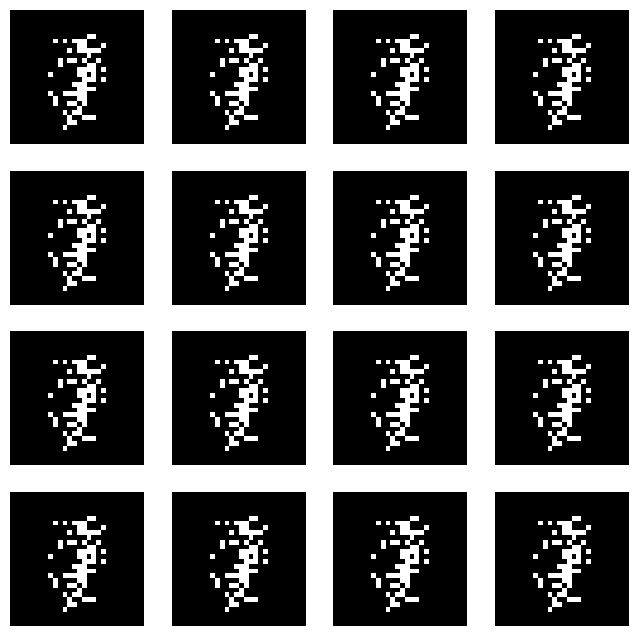

Epoch [81/100] Batch [1/938] D Loss: 0.0001, G Loss: 0.9912
Epoch [81/100] Batch [2/938] D Loss: 0.0001, G Loss: 1.0089
Epoch [81/100] Batch [3/938] D Loss: 0.0001, G Loss: 0.9912
Epoch [81/100] Batch [4/938] D Loss: 0.0001, G Loss: 1.0084
Epoch [81/100] Batch [5/938] D Loss: 0.0001, G Loss: 0.9907
Epoch [81/100] Batch [6/938] D Loss: 0.0001, G Loss: 1.0094
Epoch [81/100] Batch [7/938] D Loss: 0.0001, G Loss: 0.9905
Epoch [81/100] Batch [8/938] D Loss: 0.0001, G Loss: 1.0093
Epoch [81/100] Batch [9/938] D Loss: 0.0001, G Loss: 0.9897
Epoch [81/100] Batch [10/938] D Loss: 0.0001, G Loss: 1.0109
Epoch [81/100] Batch [11/938] D Loss: 0.0001, G Loss: 0.9897
Epoch [81/100] Batch [12/938] D Loss: 0.0001, G Loss: 1.0088
Epoch [81/100] Batch [13/938] D Loss: 0.0001, G Loss: 0.9924
Epoch [81/100] Batch [14/938] D Loss: 0.0000, G Loss: 1.0073
Epoch [81/100] Batch [15/938] D Loss: 0.0000, G Loss: 0.9928
Epoch [81/100] Batch [16/938] D Loss: 0.0000, G Loss: 1.0059
Epoch [81/100] Batch [17/938] D L

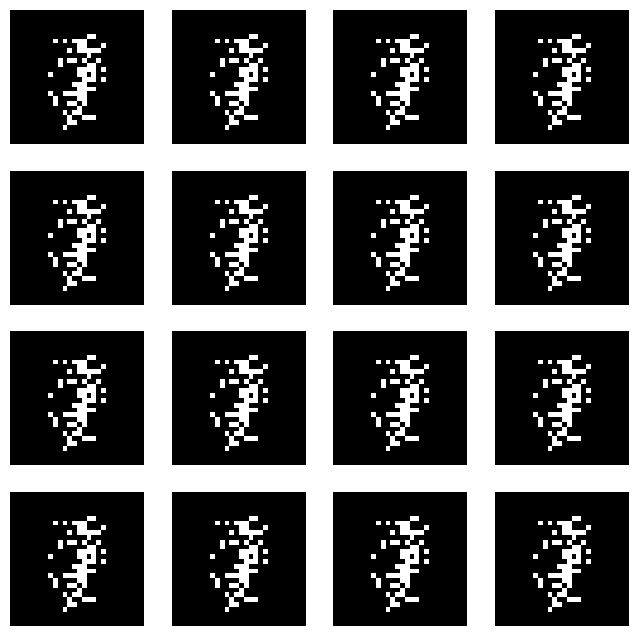

Epoch [91/100] Batch [1/938] D Loss: 0.0001, G Loss: 0.9938
Epoch [91/100] Batch [2/938] D Loss: 0.0001, G Loss: 1.0064
Epoch [91/100] Batch [3/938] D Loss: 0.0001, G Loss: 0.9932
Epoch [91/100] Batch [4/938] D Loss: 0.0001, G Loss: 1.0068
Epoch [91/100] Batch [5/938] D Loss: 0.0001, G Loss: 0.9933
Epoch [91/100] Batch [6/938] D Loss: 0.0001, G Loss: 1.0062
Epoch [91/100] Batch [7/938] D Loss: 0.0000, G Loss: 0.9942
Epoch [91/100] Batch [8/938] D Loss: 0.0000, G Loss: 1.0054
Epoch [91/100] Batch [9/938] D Loss: 0.0000, G Loss: 0.9949
Epoch [91/100] Batch [10/938] D Loss: 0.0000, G Loss: 1.0047
Epoch [91/100] Batch [11/938] D Loss: 0.0000, G Loss: 0.9957
Epoch [91/100] Batch [12/938] D Loss: 0.0000, G Loss: 1.0037
Epoch [91/100] Batch [13/938] D Loss: 0.0000, G Loss: 0.9967
Epoch [91/100] Batch [14/938] D Loss: 0.0000, G Loss: 1.0027
Epoch [91/100] Batch [15/938] D Loss: 0.0000, G Loss: 0.9976
Epoch [91/100] Batch [16/938] D Loss: 0.0000, G Loss: 1.0019
Epoch [91/100] Batch [17/938] D L

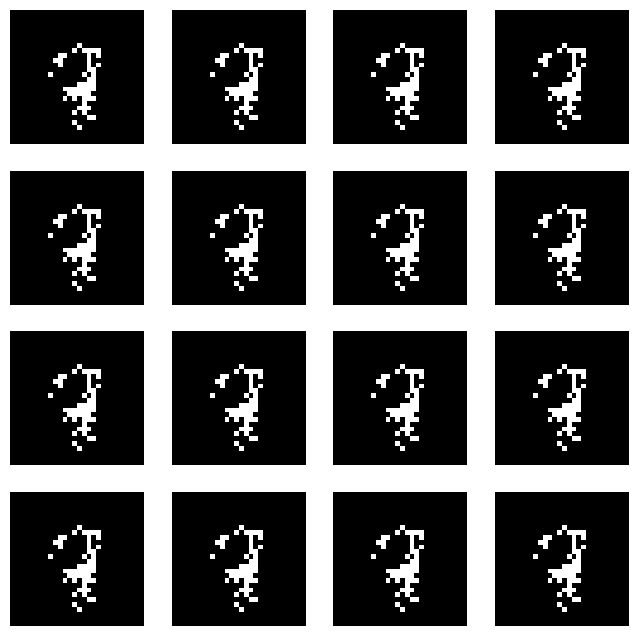

In [9]:
# Begin training
for epoch in range(epochs):  # Loop through all epochs
    for i, (imgs, _) in enumerate(dataloader):  # Loop through batches of images
        # Move real images to GPU/CPU
        real_imgs = imgs.to(device)

        # Create labels for real and fake images
        valid = torch.ones((imgs.size(0), 1), device=device)  # Label for real images: 1
        fake = torch.zeros((imgs.size(0), 1), device=device)  # Label for fake images: 0

        # ---------------------
        #  Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()  # Reset gradients for Discriminator

        # Compute loss for real images
        real_loss = criterion(discriminator(real_imgs), valid)

        # Generate fake images from random noise
        z = torch.randn((imgs.size(0), noise_dim), device=device)  # Sample noise
        fake_imgs = generator(z)  # Generate fake images
        fake_loss = criterion(discriminator(fake_imgs.detach()), fake)  # Detach to avoid training Generator here

        # Combine real and fake losses for Discriminator
        d_loss = 0.5 * (real_loss + fake_loss)  # Weighted average loss
        d_loss.backward()  # Backpropagate gradients
        optimizer_D.step()  # Update Discriminator weights

        # -----------------
        #  Train Generator
        # -----------------
        optimizer_G.zero_grad()  # Reset gradients for Generator

        # Compute loss for Generator: make fake images look real
        g_loss = criterion(discriminator(fake_imgs), valid)
        g_loss.backward()  # Backpropagate gradients
        optimizer_G.step()  # Update Generator weights

        # Print progress
        print(f"Epoch [{epoch+1}/{epochs}] Batch [{i+1}/{len(dataloader)}] "
              f"D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

    # Save and visualize generated images every 10 epochs
    if (epoch + 1) % 10 == 0:
        z = torch.randn((16, noise_dim), device=device)  # Sample noise
        generated_imgs = generator(z)  # Generate a batch of images
        plt.figure(figsize=(8, 8))  # Create a figure
        for k in range(16):  # Loop through generated images
            plt.subplot(4, 4, k + 1)  # Create a grid of subplots
            plt.imshow((generated_imgs[k].cpu().detach().squeeze() + 1) / 2, cmap="gray")  # Rescale to [0, 1]
            plt.axis('off')  # Hide axes
        plt.show()  # Display the generated images


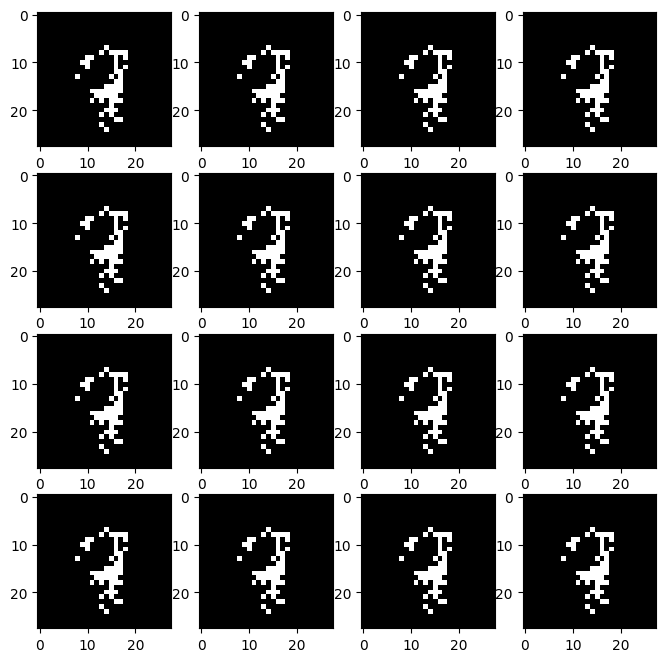

In [11]:
#  Generate fake images from random noise
z = torch.randn((16, noise_dim), device=device)  # Sample noise

generated_imgs = generator(z)  # Generate a batch of images

plt.figure(figsize=(8, 8))  # Create a figure

for k in range(16):  # Loop through generated images
    plt.subplot(4, 4, k + 1)  # Create a grid of subplots
    plt.imshow((generated_imgs[k].cpu().detach().squeeze() + 1) / 2, cmap="gray")  # Rescale to [0, 1]
    

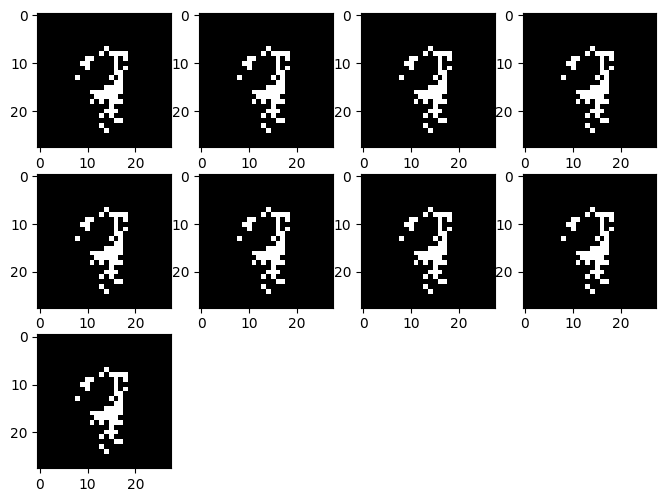

In [13]:
# Generate 9 number images
z = torch.randn((9, noise_dim), device=device)  # Sample noise

generated_imgs = generator(z)  # Generate a batch of images

plt.figure(figsize=(8, 8))  # Create a figure

for k in range(9):  # Loop through generated images
    plt.subplot(4, 4, k + 1)  # Create a grid of subplots
    plt.imshow((generated_imgs[k].cpu().detach().squeeze() + 1) / 2, cmap="gray")  # Rescale to [0, 1]
    


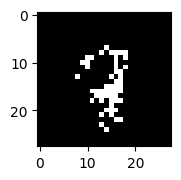

In [14]:
# Generate any real number image
z = torch.randn((1, noise_dim), device=device)  # Sample noise

generated_imgs = generator(z)  # Generate a batch of images

plt.figure(figsize=(8, 8))  # Create a figure

for k in range(1):  # Loop through generated images
    plt.subplot(4, 4, k + 1)  # Create a grid of subplots
    plt.imshow((generated_imgs[k].cpu().detach().squeeze() + 1) / 2, cmap="gray")  # Rescale to [0, 1]


















    